In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


array([[[124, 109,  97],
        [123, 107,  97],
        [114,  99,  91],
        ...,
        [ 71,  72,  61],
        [ 69,  71,  60],
        [  0,   0,   0]],

       [[124, 109,  97],
        [123, 108,  97],
        [115,  99,  92],
        ...,
        [ 72,  73,  61],
        [ 70,  71,  60],
        [  0,   0,   0]],

       [[125, 111,  99],
        [124, 109,  99],
        [115, 100,  93],
        ...,
        [ 73,  74,  62],
        [ 72,  73,  61],
        [  0,   0,   0]],

       ...,

       [[151, 124, 122],
        [153, 127, 124],
        [162, 139, 133],
        ...,
        [ 76,  73,  83],
        [ 74,  73,  83],
        [  0,   0,   0]],

       [[170, 148, 146],
        [172, 151, 149],
        [181, 162, 158],
        ...,
        [103, 102, 110],
        [102, 102, 110],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
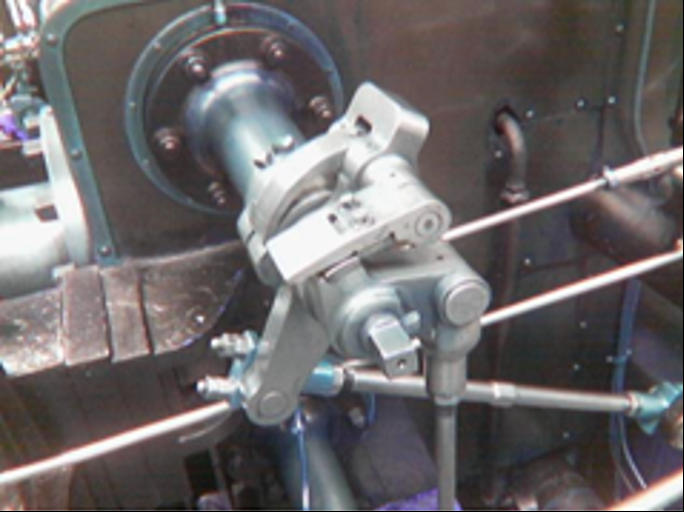

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "/content/drive/MyDrive/CodeSpace/CUHK/CMSC_CV/EdgeDetection/example_1.png"

# 读取灰度图像
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
[[0.1 0.1 0.1]
 [0.1 0.2 0.1]
 [0.1 0.1 0.1]]


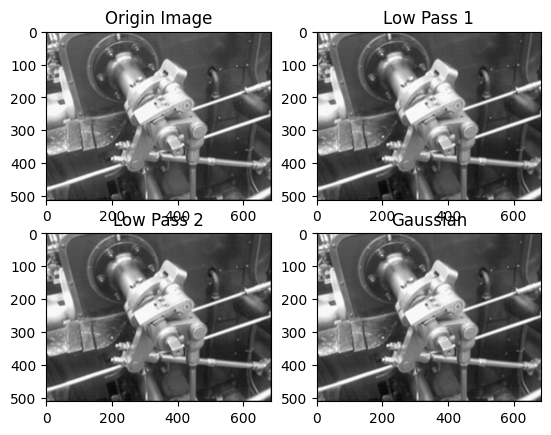

In [4]:
"""
  自己实现一个简单的低通滤波算法
"""
import numpy as np
import cv2

# 转为灰度图
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 定义kernel
low_pass_kernel_1 = (1.0/9) * np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])
low_pass_kernel_2 = (1.0/10) * np.array([
    [1, 1, 1],
    [1, 2, 1],
    [1, 1, 1]
])

print(low_pass_kernel_1)
print(low_pass_kernel_2)

smooth_low_pass_1 = cv2.filter2D(gray, -1, low_pass_kernel_1)
smooth_low_pass_2 = cv2.filter2D(gray, -1, low_pass_kernel_2)
smooth_gaussian = cv2.GaussianBlur(gray, (3, 3), 0)

# 显示结果
plt.subplot(2, 2, 1), plt.imshow(gray, cmap='gray'), plt.title('Origin Image')
plt.subplot(2, 2, 2), plt.imshow(smooth_low_pass_1, cmap='gray'), plt.title('Low Pass 1')
plt.subplot(2, 2, 3), plt.imshow(smooth_low_pass_2, cmap='gray'), plt.title('Low Pass 2')
plt.subplot(2, 2, 4), plt.imshow(smooth_gaussian, cmap='gray'), plt.title('Gaussian')
plt.show()


mean(x,y)=(0.0, 0.0)
kernel=
[[0.09474166 0.11831801 0.09474166]
 [0.11831801 0.14776132 0.11831801]
 [0.09474166 0.11831801 0.09474166]]


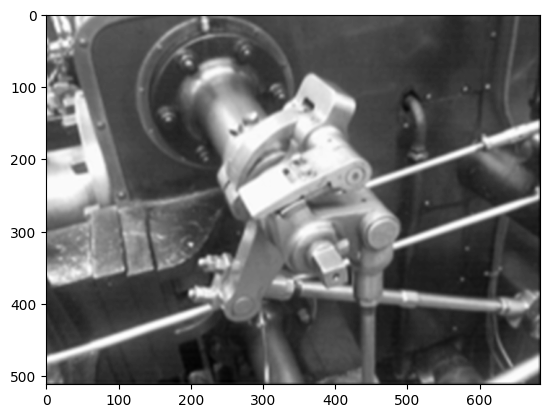

In [ ]:
"""
  手动实现一个高斯核,使用ksize=3作为范例
  参考原理：https://zhuanlan.zhihu.com/p/566375016
"""
import math
import cv2

def get_gaussian_kernel(sigma):
  arr = [
    (-1,-1), (0,-1), (1,-1),
    (-1,0), (0,0), (1,0),
    (-1,1), (0,1), (1,1)
  ]
  arr_x = np.array([p[0] for p in arr])
  arr_y = np.array([p[1] for p in arr])
  mean_x = arr_x.mean()
  mean_y = arr_y.mean()
  print(f"mean(x,y)={mean_x, mean_y}")

  sigma_pow = sigma**2

  for i in range(len(arr)):
    x = arr[i][0]
    y = arr[i][1]
    # mean都为0 这里省略了
    G_x_y = (1/(2 * math.pi * sigma_pow)) * math.pow(math.e, -(x**2+y**2)/(2*sigma_pow))
    # print(G_x_y, x, y)
    arr[i] = G_x_y

  kernel = np.array(arr).reshape((3,3))
  kernel = kernel / kernel.sum()
  return kernel

# 转为灰度图
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 获取kernel
gaussian_kernel = get_gaussian_kernel(1.5)
print(f"kernel=\n{gaussian_kernel}")
# smooth
smooth_gaussian = cv2.filter2D(gray, -1, gaussian_kernel)

plt.imshow(smooth_gaussian, cmap='gray')
plt.show()

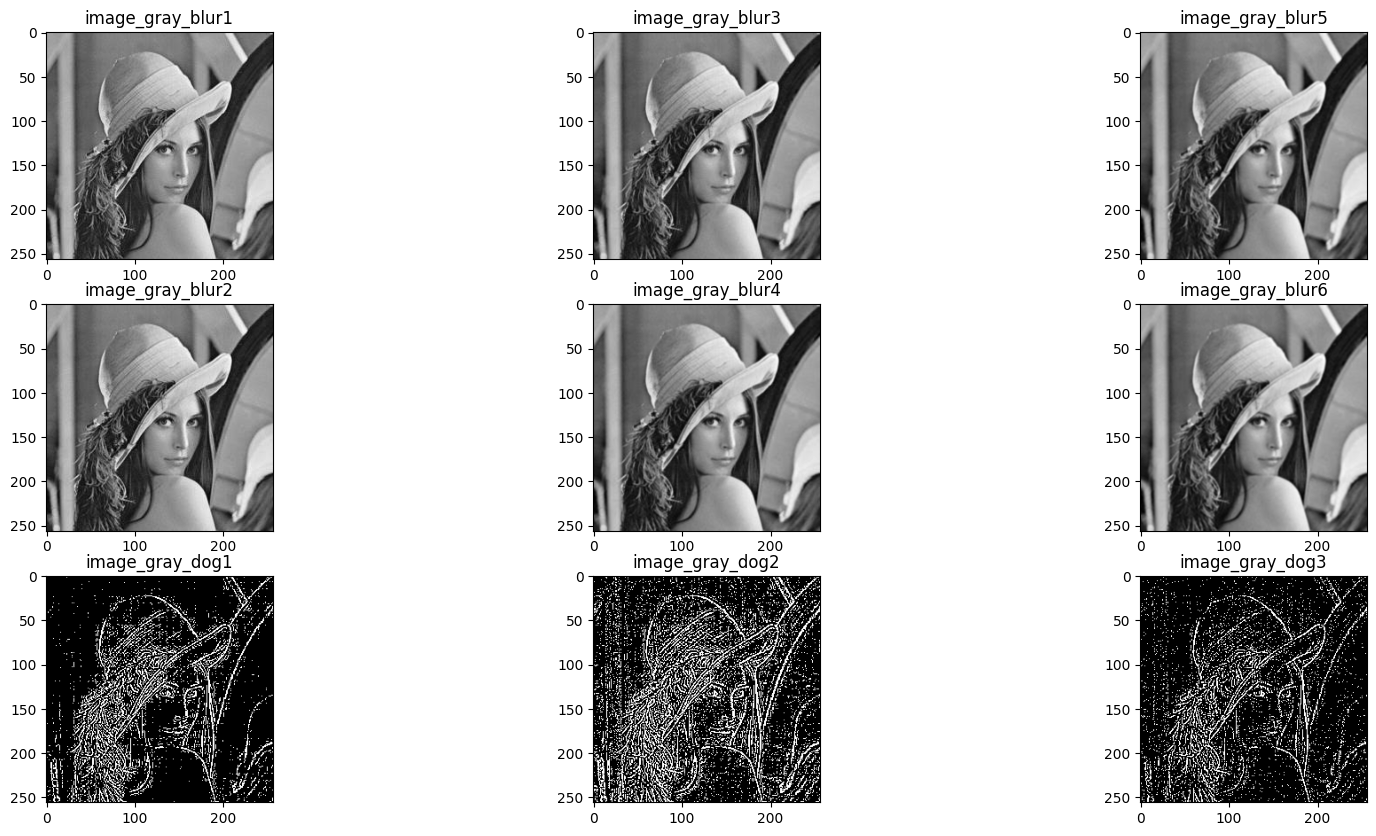

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# NMS过程，非特征点设置为0
def getExtrema(A, B, C, thresh):
  height,width= A.shape
  resu = np.ones((height, width), A.dtype) * 100
  for row in range(1, height-1):
    for col in range(1, width-1):
      # 暂存center处的取值
      center = B[row, col]
      if center < thresh:
        continue
      # center处设置为邻居值，避免参与min，max运算
      B[row, col] = B[row, col - 1]
      minValue = np.vstack([A[row-1:row+2, col-1:col+2], B[row-1:row+2, col-1:col+2],C[row-1:row+2, col-1:col+2]]).min()
      maxValue = np.vstack([A[row - 1:row + 2, col - 1:col + 2], B[row - 1:row + 2, col - 1:col + 2],
                            C[row - 1:row + 2, col - 1:col + 2]]).max()
      if center < minValue:
          resu[row, col] = 0
      if center > maxValue:
          resu[row, col] = 255
      B[row, col] = center
  return resu


# 读取灰度图像
img_path = "/content/drive/MyDrive/CodeSpace/CUHK/CMSC_CV/EdgeDetection/girl.png"
image = cv2.imread(img_path, cv2.IMREAD_COLOR)
image_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# 使用不同的sigma进行Gaussian Blur（一共6层）
image_gray_blur1 = cv2.GaussianBlur(image_gray, (3, 3), 0.3)
image_gray_blur2 = cv2.GaussianBlur(image_gray, (3, 3), 0.4)
image_gray_blur3 = cv2.GaussianBlur(image_gray, (3, 3), 0.5)
image_gray_blur4 = cv2.GaussianBlur(image_gray, (3, 3), 0.6)
image_gray_blur5 = cv2.GaussianBlur(image_gray, (3, 3), 0.7)
image_gray_blur6 = cv2.GaussianBlur(image_gray, (3, 3), 0.8)

# 获得差分（三层）
image_gray_dog1 = image_gray_blur2 - image_gray_blur1
image_gray_dog2 = image_gray_blur4 - image_gray_blur3
image_gray_dog3 = image_gray_blur6 - image_gray_blur5

# 显示结果 1
plt.figure(figsize=(20, 10))
plt.subplot(3, 3, 1), plt.imshow(image_gray_blur1, cmap='gray'), plt.title('image_gray_blur1')
plt.subplot(3, 3, 2), plt.imshow(image_gray_blur3, cmap='gray'), plt.title('image_gray_blur3')
plt.subplot(3, 3, 3), plt.imshow(image_gray_blur5, cmap='gray'), plt.title('image_gray_blur5')
plt.subplot(3, 3, 4), plt.imshow(image_gray_blur2, cmap='gray'), plt.title('image_gray_blur2')
plt.subplot(3, 3, 5), plt.imshow(image_gray_blur4, cmap='gray'), plt.title('image_gray_blur4')
plt.subplot(3, 3, 6), plt.imshow(image_gray_blur6, cmap='gray'), plt.title('image_gray_blur6')
plt.subplot(3, 3, 7), plt.imshow(image_gray_dog1, cmap='gray'), plt.title('image_gray_dog1')
plt.subplot(3, 3, 8), plt.imshow(image_gray_dog2, cmap='gray'), plt.title('image_gray_dog2')
plt.subplot(3, 3, 9), plt.imshow(image_gray_dog3, cmap='gray'), plt.title('image_gray_dog3')
plt.show()


(256, 256, 3) (256, 256)


(<Axes: title={'center': 'image'}>,
 Text(0.5, 1.0, 'image'))

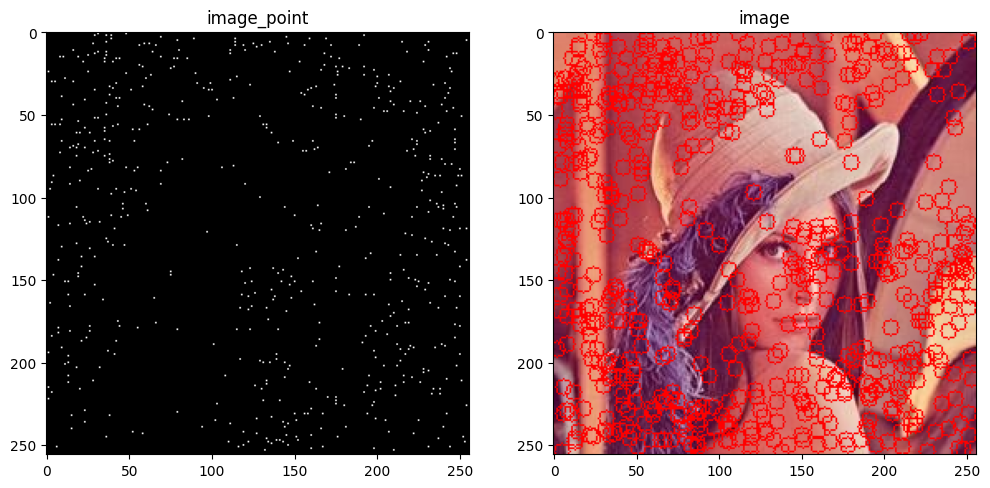

In [22]:
# 使用cv2圈出特征点位置
def addPoint(image, image_point):
  print(image.shape, image_point.shape)
  height, width, dvim = image.shape
  for row in range(0, height):
    for col in range(0, width):
      if image_point[row, col] == 255:
        cv2.circle(image, (row, col), 5, thickness=1, color=[0,0,255])
      elif image_point[row, col] == 0:
        cv2.circle(image, (row, col), 5, thickness=1, color=[0,255,0])

# 显示结果 2
# 读取灰度图像
img_path = "/content/drive/MyDrive/CodeSpace/CUHK/CMSC_CV/EdgeDetection/girl.png"
image = cv2.imread(img_path, cv2.IMREAD_COLOR)
image_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
image_point = getExtrema(image_gray_dog1, image_gray_dog2, image_gray_dog3, 2)
addPoint(image, image_point)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(image_point, cmap='gray'), plt.title('image_point')
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('image')